In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x1 = [np.cos(((4*x -3)/10)*np.pi) for x in range(1,6)]
x2 = [np.sin(((4*x -3)/10)*np.pi) for x in range(1,6)]

In [3]:
y = [1,1,1,-1,-1]

In [4]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

In [5]:
df

,x1,x2,y
0,9.510565e-01,0.309017,1
1,6.123234e-17,1.000000,1
2,-9.510565e-01,0.309017,1
3,-5.877853e-01,-0.809017,-1
4,5.877853e-01,-0.809017,-1


In [81]:
beta = [np.array(-.5), np.array([0,1])]

In [7]:
beta

[array(-0.5), array([0, 1])]

# Step A

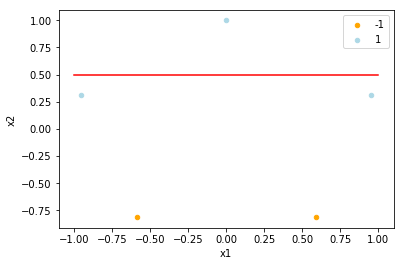

In [184]:
new_ax = df[3:6].plot.scatter(x='x1', y='x2', color = 'Orange', label = '-1')
df[0:3].plot.scatter(x='x1', y='x2', color = 'LightBlue', label = '1', ax = new_ax)
x = np.linspace(-1, 1)
y = beta[1][0]/beta[1][1] * x - beta[0]
new_ax.plot(x, y, '-r')
plt.show()

# Step B

In [15]:
m_i = beta[0] + beta[1] * df[['x1', 'x2']]
m_i.x2

0   -0.190983
1    0.500000
2   -0.190983
3   -1.309017
4   -1.309017
Name: x2, dtype: float64

# Step C

M^t = x1, x3

In [23]:
m_i2 = df[np.logical_and(m_i.x2<0,df.y==1) | np.logical_and(m_i.x2>0,df.y==-1)]

In [24]:
m_i2

,x1,x2,y
0,0.951057,0.309017,1
2,-0.951057,0.309017,1


# Step D

In [32]:
error_i = beta[0] + beta[1] *m_i2[['x1', 'x2']]
d_i = -(np.sum(m_i2.y*(error_i['x2'])))
d_i

0.3819660112501051

# Step E

In [172]:
beta_i = .5 * np.array(m_i2.y[0] * m_i2[['x1','x2']].iloc[0])

In [173]:
beta_0 = .5 * m_i2.y[0]

In [174]:
beta_i

array([ 0.47552826,  0.1545085 ])

In [175]:
beta_0

0.5

In [176]:
beta_0i = beta[0] + beta_0
beta_n_i = beta[1] + beta_i

In [177]:
beta_0i

0.0

In [178]:
beta_n_i

array([ 0.47552826,  1.1545085 ])

# Step F

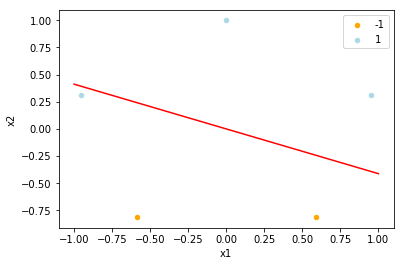

In [185]:
new_ax = df[3:6].plot.scatter(x='x1', y='x2', color = 'Orange', label = '-1')
df[0:3].plot.scatter(x='x1', y='x2', color = 'LightBlue', label = '1', ax = new_ax)
x = np.linspace(-1, 1)
y = -(beta_n_i[0]/beta_n_i[1]) * x - beta_0i
new_ax.plot(x, y, '-r')
plt.show()

# Step G

In [116]:
from math import sqrt

In [128]:
m_n_i = beta_0i + beta_n_i * df[['x1', 'x2']]
m_n_i

,x1,x2
0,4.522542e-01,0.356763
1,2.911771e-17,1.154508
2,-4.522542e-01,0.356763
3,-2.795085e-01,-0.934017
4,2.795085e-01,-0.934017


In [131]:
signed_d = (m_n_i['x1'] + m_n_i['x2'])/ sqrt(np.sum(np.square(beta_n_i)))
signed_d

0    0.647936
1    0.924638
2   -0.076478
3   -0.971904
4   -0.524191
dtype: float64

# Step H

In [134]:
m_i3 = df[np.logical_and(signed_d<0,df.y==1) | np.logical_and(signed_d>0,df.y==-1)]
m_i3

,x1,x2,y
2,-0.951057,0.309017,1


# Step I

In [155]:
error_i = beta_0i + beta_n_i *m_i3[['x1', 'x2']]
d_i = -(np.sum(1*(error_i[['x1', 'x2']].iloc[0])))
d_i

0.095491502812526163

# Step J

In [168]:
.5 * np.array(1 * m_i3[['x1','x2']].iloc[0])

array([-0.47552826,  0.1545085 ])

In [181]:
beta_i2 = beta_n_i + .5 * np.array(1 * m_i3[['x1','x2']].iloc[0])
beta_02 = beta_0i +  .5 * 1

In [182]:
beta_i2

array([ 0.        ,  1.30901699])

In [183]:
beta_02

0.5

# Step K

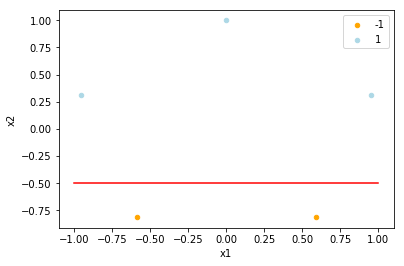

In [186]:
new_ax = df[3:6].plot.scatter(x='x1', y='x2', color = 'Orange', label = '-1')
df[0:3].plot.scatter(x='x1', y='x2', color = 'LightBlue', label = '1', ax = new_ax)
x = np.linspace(-1, 1)
y = -(beta_i2[0]/beta_i2[1]) * x - beta_02
new_ax.plot(x, y, '-r')
plt.show()

In [199]:
m_n_i2 = beta_02 + beta_i2 * df[['x1', 'x2']]
m_n_i2
signed_d2 = (m_n_i2['x2'])/ sqrt(np.sum(np.square(beta_i2)))
signed_d2

0    0.690983
1    1.381966
2    0.690983
3   -0.427051
4   -0.427051
Name: x2, dtype: float64

# Step M

Empty set

In [188]:
m_n_i2['x1']

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: x1, dtype: float64